In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
image = mpimg.imread('ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

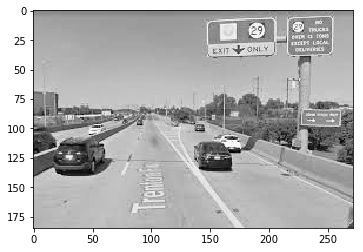

In [5]:
plt.imshow(gray, cmap="Greys_r")

In [6]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

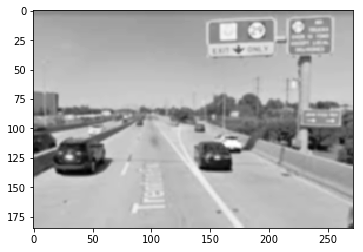

In [8]:
plt.imshow(blur_gray, cmap="Greys_r")

In [9]:
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

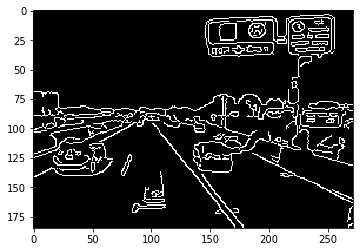

In [10]:
plt.imshow(masked_edges, cmap="Greys_r")

In [18]:
rho = 2
theta = np.pi/180
threshold = 15
min_line_length = 40
max_line_gap = 20
line_image = np.copy(image)*0 

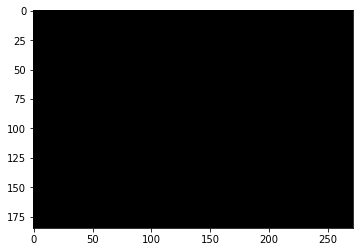

In [19]:
plt.imshow(line_image, cmap="Greys_r")

In [20]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


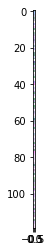

In [21]:
plt.imshow(lines, cmap="Greys_r")

In [22]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

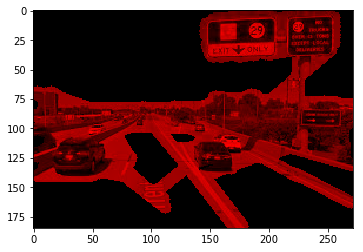

In [40]:
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 
vertices = np.array([[(0,image.shape[0]),(450, 290), (490, 290), (image.shape[1],image.shape[0])]], dtype=np.int32)
x= cv2.fillPoly(line_image, vertices, 255)
masked_image = cv2.bitwise_and(image, line_image)
plt.imshow(masked_image, cmap="Greys_r")

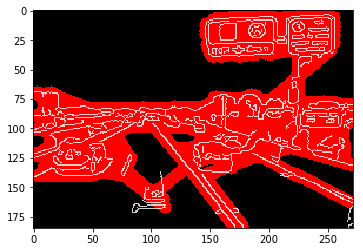

In [38]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)